## Read coincidence indexes


In [21]:
import re
from collections import Counter
# diagnostic — run this in a notebook cell
import importlib, inspect, sys

try:
    import crackvigenere
except Exception as e:
    print("Importing module failed:", e)
else:
    print("module path:", getattr(crackvigenere, "__file__", "<built-in>"))
    names = [n for n in dir(crackvigenere) if not n.startswith("_")]
    print("exported names:", names)
    for name in ("crack_vigenere_by_freq_from_file", "decrypt_file", "vigenere_decrypt"):
        print(f"{name}: {'YES' if hasattr(crackvigenere, name) else 'NO'}")
    # show head of source to inspect where functions are defined
    try:
        src = inspect.getsource(crackvigenere)
        print("\n--- source head ---\n")
        print("\n".join(src.splitlines()[:200]))
    except OSError:
        print("source not available via inspect.getsource")
    # if you edit the file, reload it:
    importlib.reload(crackvigenere)
    print("\n(reloaded module)")

module path: /home/loqi/Área de trabalho/Arquivos/Livros e documentos/ENSEA/IS/Cryptographie/TP/crackvigenere.py
exported names: ['Counter', 'coincidence_indexes_from_file', 'coincidence_indexes_from_text', 'friedman_test_from_file', 'friedman_test_from_text', 're']
crack_vigenere_by_freq_from_file: NO
decrypt_file: NO
vigenere_decrypt: NO

--- source head ---

import re
from collections import Counter

#!/usr/bin/env python3
# crackvigenere.py
# Calculate and print Index of Coincidence contributions per letter for Exo3.txt


def coincidence_indexes_from_file(path='Exo3.txt'):
    """
    Read file, keep only A-Z letters, compute per-letter IoC contributions and total IoC.
    Returns (ioc_per_letter_dict, total_ioc, counts, N)
    """
    with open(path, 'r', encoding='utf-8') as f:
        text = f.read()
    return coincidence_indexes_from_text(text)


def coincidence_indexes_from_text(text):
    """
    Compute per-letter Index of Coincidence contributions and total IoC from a text

In [5]:
def coincidence_indexes_from_file(path='Exo3.txt'):
    """
    Read file, keep only A-Z letters, compute per-letter IoC contributions and total IoC.
    Returns (ioc_per_letter_dict, total_ioc, counts, N)
    """
    with open(path, 'r', encoding='utf-8') as f:
        text = f.read()
    letters = re.sub(r'[^A-Za-z]', '', text).upper()
    N = len(letters)
    if N < 2:
        print("Not enough letters to compute Index of Coincidence (N < 2).")
        return {}, 0.0, {}, N

    counts = Counter(letters)
    denom = N * (N - 1)
    ioc_per_letter = {}
    print(f"Total letters (N) = {N}")
    print(f"{'Letter':>6} {'Count':>8} {'Freq%':>8} {'IoC_contrib':>14}")
    for code in range(65, 91):  # A-Z
        L = chr(code)
        f_i = counts.get(L, 0)
        freq_pct = 100.0 * f_i / N
        contrib = (f_i * (f_i - 1)) / denom
        ioc_per_letter[L] = contrib
        print(f"{L:>6} {f_i:8d} {freq_pct:8.3f} {contrib:14.8f}")

    total_ioc = sum(ioc_per_letter.values())
    print(f"\nTotal Index of Coincidence = {total_ioc:.8f}")
    return ioc_per_letter, total_ioc, counts, N

if __name__ == "__main__":
    coincidence_indexes_from_file('Exo3.txt')

Total letters (N) = 532
Letter    Count    Freq%    IoC_contrib
     A       22    4.135     0.00163544
     B       12    2.256     0.00046727
     C       12    2.256     0.00046727
     D       10    1.880     0.00031859
     E       34    6.391     0.00397179
     F       19    3.571     0.00121065
     G       16    3.008     0.00084958
     H       14    2.632     0.00064427
     I       39    7.331     0.00524617
     J       17    3.195     0.00096286
     K       15    2.820     0.00074338
     L       22    4.135     0.00163544
     M       32    6.015     0.00351160
     N       23    4.323     0.00179120
     O        8    1.504     0.00019824
     P       12    2.256     0.00046727
     Q       16    3.008     0.00084958
     R       27    5.075     0.00248503
     S       24    4.511     0.00195404
     T       13    2.444     0.00055223
     U       16    3.008     0.00084958
     V       32    6.015     0.00351160
     W       51    9.586     0.00902680
     X       18 

In [6]:
coincidence_indexes_from_file();

Total letters (N) = 532
Letter    Count    Freq%    IoC_contrib
     A       22    4.135     0.00163544
     B       12    2.256     0.00046727
     C       12    2.256     0.00046727
     D       10    1.880     0.00031859
     E       34    6.391     0.00397179
     F       19    3.571     0.00121065
     G       16    3.008     0.00084958
     H       14    2.632     0.00064427
     I       39    7.331     0.00524617
     J       17    3.195     0.00096286
     K       15    2.820     0.00074338
     L       22    4.135     0.00163544
     M       32    6.015     0.00351160
     N       23    4.323     0.00179120
     O        8    1.504     0.00019824
     P       12    2.256     0.00046727
     Q       16    3.008     0.00084958
     R       27    5.075     0.00248503
     S       24    4.511     0.00195404
     T       13    2.444     0.00055223
     U       16    3.008     0.00084958
     V       32    6.015     0.00351160
     W       51    9.586     0.00902680
     X       18 

Total letters (N) = 532
Letter    Count    Freq%    IoC_contrib
     A       22    4.135     0.00163544
     B       12    2.256     0.00046727
     C       12    2.256     0.00046727
     D       10    1.880     0.00031859
     E       34    6.391     0.00397179
     F       19    3.571     0.00121065
     G       16    3.008     0.00084958
     H       14    2.632     0.00064427
     I       39    7.331     0.00524617
     J       17    3.195     0.00096286
     K       15    2.820     0.00074338
     L       22    4.135     0.00163544
     M       32    6.015     0.00351160
     N       23    4.323     0.00179120
     O        8    1.504     0.00019824
     P       12    2.256     0.00046727
     Q       16    3.008     0.00084958
     R       27    5.075     0.00248503
     S       24    4.511     0.00195404
     T       13    2.444     0.00055223
     U       16    3.008     0.00084958
     V       32    6.015     0.00351160
     W       51    9.586     0.00902680
     X       18 

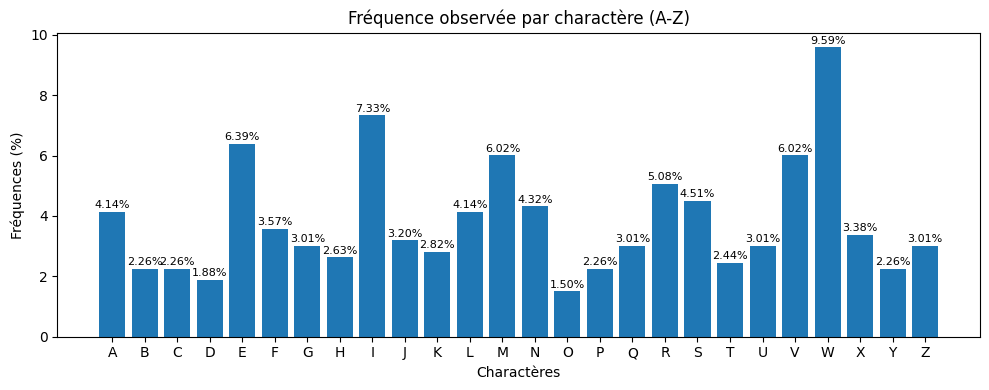

In [42]:
# Plot letter frequencies using matplotlib
import matplotlib.pyplot as plt

# Call function to compute IoC and counts (it prints summary)
ioc_map, total_ioc, counts, N = coincidence_indexes_from_file()

letters = [chr(c) for c in range(65, 91)]  # A-Z
freqs = [counts.get(L, 0) for L in letters]
freq_pct = [100.0 * f / N if N > 0 else 0 for f in freqs]

fig, ax = plt.subplots(figsize=(10, 4))
ax.bar(letters, freq_pct, color='C0')
ax.set_xlabel('Charactères')
ax.set_ylabel('Fréquences (%)')
ax.set_title('Fréquence observée par charactère (A-Z)')
for i, v in enumerate(freq_pct):
    if v > 0:
        ax.text(i, v + 0.05, f'{v:.2f}%', ha='center', va='bottom', fontsize=8)
plt.tight_layout()
# In a notebook this would display; save the image for verification
plt.savefig('letter_frequencies.png')
print("Saved plot to letter_frequencies.png")

Total letters (N) = 532
Letter    Count    Freq%    IoC_contrib
     A       22    4.135     0.00163544
     B       12    2.256     0.00046727
     C       12    2.256     0.00046727
     D       10    1.880     0.00031859
     E       34    6.391     0.00397179
     F       19    3.571     0.00121065
     G       16    3.008     0.00084958
     H       14    2.632     0.00064427
     I       39    7.331     0.00524617
     J       17    3.195     0.00096286
     K       15    2.820     0.00074338
     L       22    4.135     0.00163544
     M       32    6.015     0.00351160
     N       23    4.323     0.00179120
     O        8    1.504     0.00019824
     P       12    2.256     0.00046727
     Q       16    3.008     0.00084958
     R       27    5.075     0.00248503
     S       24    4.511     0.00195404
     T       13    2.444     0.00055223
     U       16    3.008     0.00084958
     V       32    6.015     0.00351160
     W       51    9.586     0.00902680
     X       18 

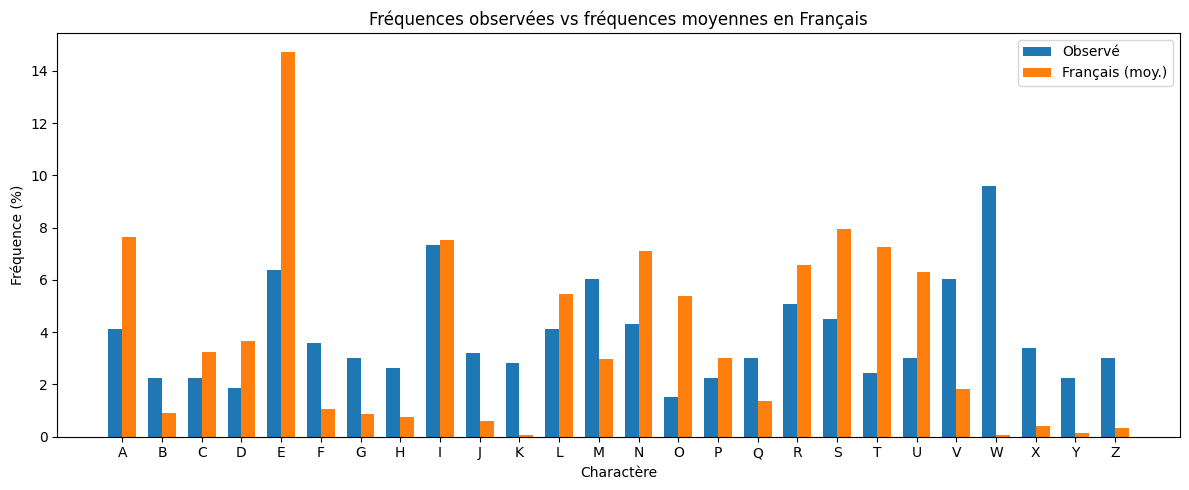

In [43]:
# Compare against average French letter frequencies (approx. percentages)
import numpy as np
french_freq = {
    'A':7.636, 'B':0.901, 'C':3.260, 'D':3.669, 'E':14.715, 'F':1.066,
    'G':0.866, 'H':0.737, 'I':7.529, 'J':0.613, 'K':0.049, 'L':5.456,
    'M':2.968, 'N':7.095, 'O':5.378, 'P':3.021, 'Q':1.362, 'R':6.553,
    'S':7.948, 'T':7.244, 'U':6.311, 'V':1.838, 'W':0.074, 'X':0.427,
    'Y':0.128, 'Z':0.326
}

# Recompute counts/frequencies from the text to ensure cell independence
ioc_map, total_ioc, counts, N = coincidence_indexes_from_file()
letters = [chr(c) for c in range(65, 91)]
obs_pct = [100.0 * counts.get(L, 0) / N if N>0 else 0 for L in letters]
fr_pct = [french_freq.get(L, 0.0) for L in letters]

x = np.arange(len(letters))
width = 0.35
fig, ax = plt.subplots(figsize=(12,5))
ax.bar(x - width/2, obs_pct, width, label='Observé', color='C0')
ax.bar(x + width/2, fr_pct, width, label='Français (moy.)', color='C1')
ax.set_xticks(x)
ax.set_xticklabels(letters)
ax.set_xlabel('Charactère')
ax.set_ylabel('Fréquence (%)')
ax.set_title('Fréquences observées vs fréquences moyennes en Français')
ax.legend()
plt.tight_layout()
plt.savefig('freqs_vs_french.png')
print('Saved comparison plot to freqs_vs_french.png')

In [31]:
# Run Friedman test (try increasing k) and print results in sequence
from crackvigenere import friedman_test_from_file
# Adjust parameters as needed: max_k, target IoC, tolerance
res = friedman_test_from_file('Exo3.txt', max_k=30, target=0.0778, tol=0.002, verbose=False)
if not res:
    print('No results (empty text or problem reading file).')
else:
    for k in sorted(res.keys()):
        avg_ioc, per_subseq = res[k]
        print(f'k={k}: avg IoC={avg_ioc:.6f}')
        print(' per-subseq IoC: ' + ', '.join(f'{v:.6f}' for v in per_subseq))
        print()

k=1: avg IoC=0.045750
 per-subseq IoC: 0.045750

k=2: avg IoC=0.045822
 per-subseq IoC: 0.044999, 0.046645

k=3: avg IoC=0.045824
 per-subseq IoC: 0.049260, 0.043850, 0.044363

k=4: avg IoC=0.045341
 per-subseq IoC: 0.045455, 0.041809, 0.044315, 0.049784

k=5: avg IoC=0.045220
 per-subseq IoC: 0.045847, 0.046200, 0.038455, 0.049596, 0.046002

k=6: avg IoC=0.046350
 per-subseq IoC: 0.047497, 0.043667, 0.042901, 0.052605, 0.044932, 0.046499

k=7: avg IoC=0.074887
 per-subseq IoC: 0.064912, 0.072982, 0.095789, 0.069474, 0.074035, 0.063158, 0.083860

k=8: avg IoC=0.045261
 per-subseq IoC: 0.046133, 0.036183, 0.056536, 0.047942, 0.040093, 0.042890, 0.040093, 0.052214

k=9: avg IoC=0.047600
 per-subseq IoC: 0.067797, 0.035067, 0.047925, 0.053770, 0.046756, 0.052016, 0.040327, 0.044418, 0.040327

k=10: avg IoC=0.046044
 per-subseq IoC: 0.038435, 0.046820, 0.040639, 0.055152, 0.053701, 0.050798, 0.038462, 0.040639, 0.053701, 0.042090

k=11: avg IoC=0.046473
 per-subseq IoC: 0.039966, 0.045918,

In [26]:
# Assemble probable key by taking the top-scoring candidate per key position (k=7)
from crackvigenere import crack_vigenere_by_freq_from_file, decrypt_file
res = crack_vigenere_by_freq_from_file('Exo3.txt', k=7, top_n=1)
if not res:
    print('No candidates found; check input file or parameters.')
else:
    key_chars = []
    for pos_cands in res:
        shift, letter, score, freqs = pos_cands[0]  # top candidate
        key_chars.append(letter)
    key = ''.join(key_chars)
    print('probable key found:', key)

probable key found: ENSEAIS


In [29]:
# Decrypt the message using the probable key and print a plaintext snippet
# Recompute probable key (top candidate per position)
res = crack_vigenere_by_freq_from_file('Exo3.txt', k=7, top_n=1)
if not res:
    print('No key candidates found; aborting decryption.')
else:
    key = ''.join(pos[0][1] for pos in res)
    print('probable key found:', key)
    # Decrypt and show the first 800 characters of the plaintext
    plaintext = decrypt_file('Exo3.txt', key)
    print('Decrypted plaintext (first 800 chars):')
    print(plaintext[:800])

probable key found: ENSEAIS
Decrypted plaintext (first 800 chars):
FELICITATIONSPOURAVOIRTROUVELACLEDECHIFFREMENTVOUSAVEZREUSSICET EXERCICEDE
CRYPTOGRAPHIEFELICITATIONSENCOREUNEFOISPOURVOTRETRAVAIL REMARQUABLE VOUSAVEZ
FAITPREUVEDEPERSEVERANCEETDELOGIQUEPOURDECODERCE MESSAGE SECRET BRAVOPOUR
VOTREDETERMINATIONLA CRYPTOGRAPHIEESTUNARTANCIENQUI REMONTEALANTIQUITE
FELICITATIONS VOUS MAITRISEZMAINTENANTLESBASESDUCHIFFREMENT DE VIGENERECESYSTEME
AETEINVENTEAUSEIZIEMESIECLEBRAVOPOURAVOIRPERCECEMYSTERE LA CRYPTANALYSE DEMANDE
DELAPATIENCE FELICITATIONSVOUSAVEZLESCOMPETENCESNECESSAIRES POUR CONTINUER
DANSCETTEVOIEBRAVOENCORE
